Import Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
import os

Import Dataset

https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

In [2]:
# all_files = os.listdir('input/DVF')
all_files=['2022.txt']
df = pd.concat((pd.read_csv('./input/DVF/'+ f, delimiter='|', decimal=',',
    usecols = ['Date mutation','Valeur fonciere', 'No voie', 'Type de voie', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Type local', 'Surface reelle bati', 'Nombre pieces principales'])) 
    for f in all_files)

df = df[(df['Type local']=='Appartement') | (df['Type local']=='Maison')]
df = df[df['Code departement']==75]
df['Valeur fonciere'] = pd.to_numeric(df['Valeur fonciere'])
df['Date mutation'] = pd.to_datetime(df['Date mutation'])

print(f'En 2022, il y a eu {df.size} ventes à Paris')

C:\Users\Quentin\AppData\Local\Temp\ipykernel_10620\3779001930.py:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv('./input/DVF/'+ f, delimiter='|', decimal=',',


En 2022, il y a eu 239173 ventes à Paris


C:\Users\Quentin\AppData\Local\Temp\ipykernel_10620\3779001930.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date mutation'] = pd.to_datetime(df['Date mutation'])


In [3]:
df['prix / m2'] = df['Valeur fonciere'] / df['Surface reelle bati']

df[['Valeur fonciere', 'Surface reelle bati', 'prix / m2']].describe()

,Valeur fonciere,Surface reelle bati,prix / m2
count,2.094400e+04,21743.000000,2.094400e+04
mean,1.641953e+06,54.382928,3.939521e+04
std,6.667643e+06,42.224407,1.812587e+05
min,1.000000e+00,2.000000,5.917160e-03
25%,2.946125e+05,28.000000,9.378811e+03
50%,4.900000e+05,43.000000,1.111111e+04
75%,9.100000e+05,69.000000,1.380815e+04
max,2.074000e+08,780.000000,5.200000e+06


(0.0, 10000000.0)

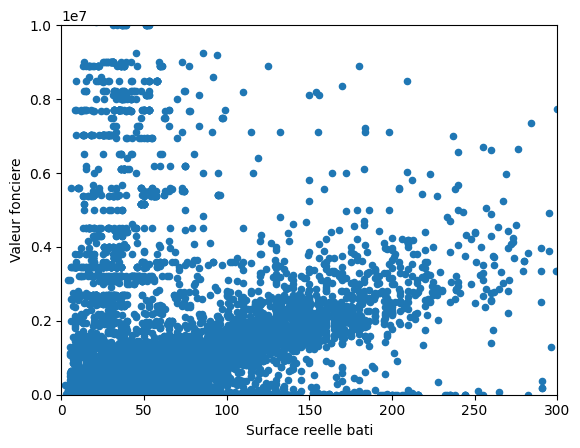

In [16]:
ax1 = df.plot.scatter(x='Surface reelle bati', y='Valeur fonciere')
ax1.set_xlim([0, 300])
ax1.set_ylim([0, 10000000])

C:\Users\Quentin\AppData\Local\Temp\ipykernel_10620\3483383253.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_arrond = df.groupby(['Code postal']).mean()


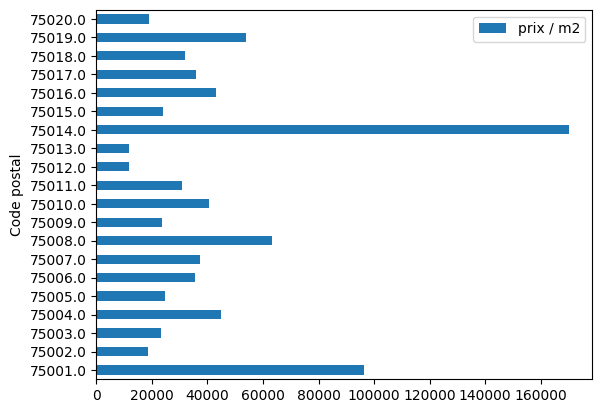

In [13]:
df_arrond = df.groupby(['Code postal']).mean()
ax2 = df_arrond.plot.barh(y='prix / m2', use_index=True)
plt.show()